In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Netflix Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [3]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [6]:
df.duplicated().sum()

np.int64(2)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [9]:
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [10]:
for col in ['director', 'cast', 'country', 'rating', 'duration']:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

In [11]:
if 'date_added' in df.columns:
    df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7787 non-null   object
 1   Category      7787 non-null   object
 2   Title         7787 non-null   object
 3   Director      5399 non-null   object
 4   Cast          7069 non-null   object
 5   Country       7280 non-null   object
 6   Release_Date  7777 non-null   object
 7   Rating        7780 non-null   object
 8   Duration      7787 non-null   object
 9   Type          7787 non-null   object
 10  Description   7787 non-null   object
dtypes: object(11)
memory usage: 730.0+ KB


/tmp/ipython-input-3024852740.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


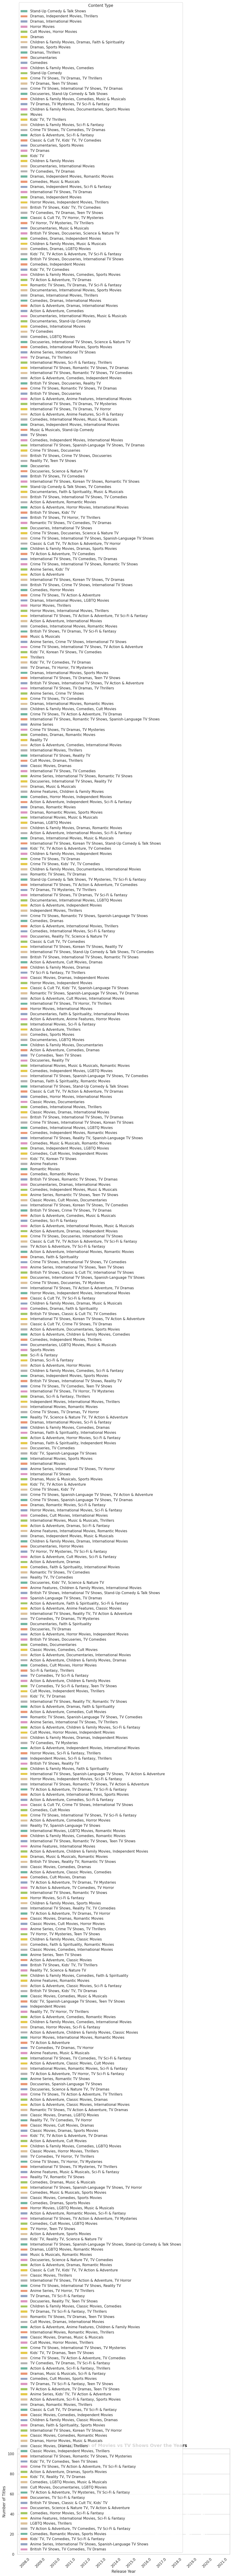

In [17]:
sns.set(style="whitegrid")

if 'release_year' in df.columns:
    df['release_year'] = df['release_year']
else:
    df['release_year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year', hue='Type', palette='Set2')
plt.title('Distribution of Movies vs TV Shows Over the Years', fontsize=14, weight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

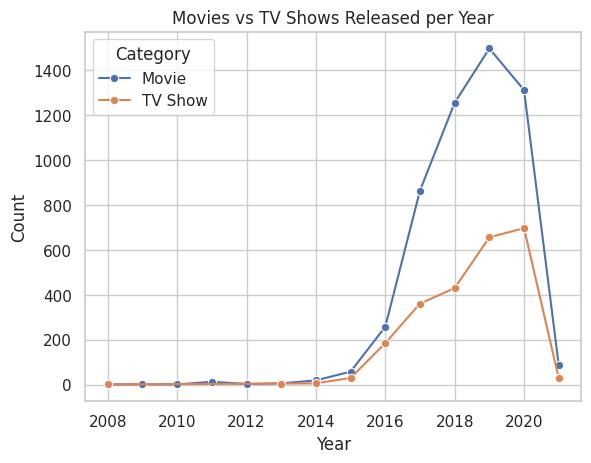

In [25]:
content_trend = df.groupby(['release_year', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='release_year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


----- Top 10 Most Common Genres -----
genre
International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64


/tmp/ipython-input-1502652748.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='coolwarm')


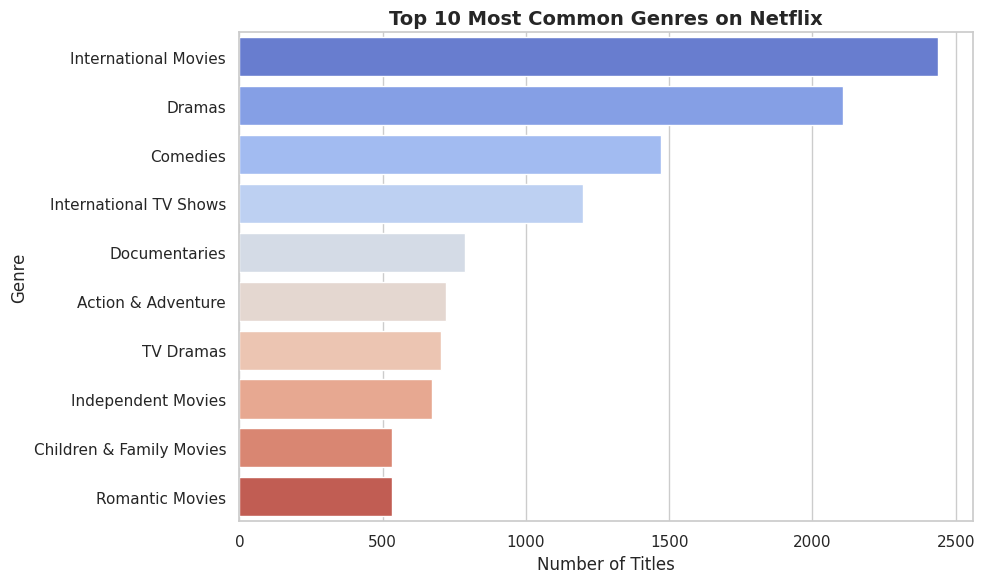

In [19]:
df_genres = df.assign(genre=df['Type'].str.split(', ')).explode('genre')

top_genres = df_genres['genre'].value_counts().head(10)
print("\n----- Top 10 Most Common Genres -----")
print(top_genres)

plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='coolwarm')
plt.title('Top 10 Most Common Genres on Netflix', fontsize=14, weight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

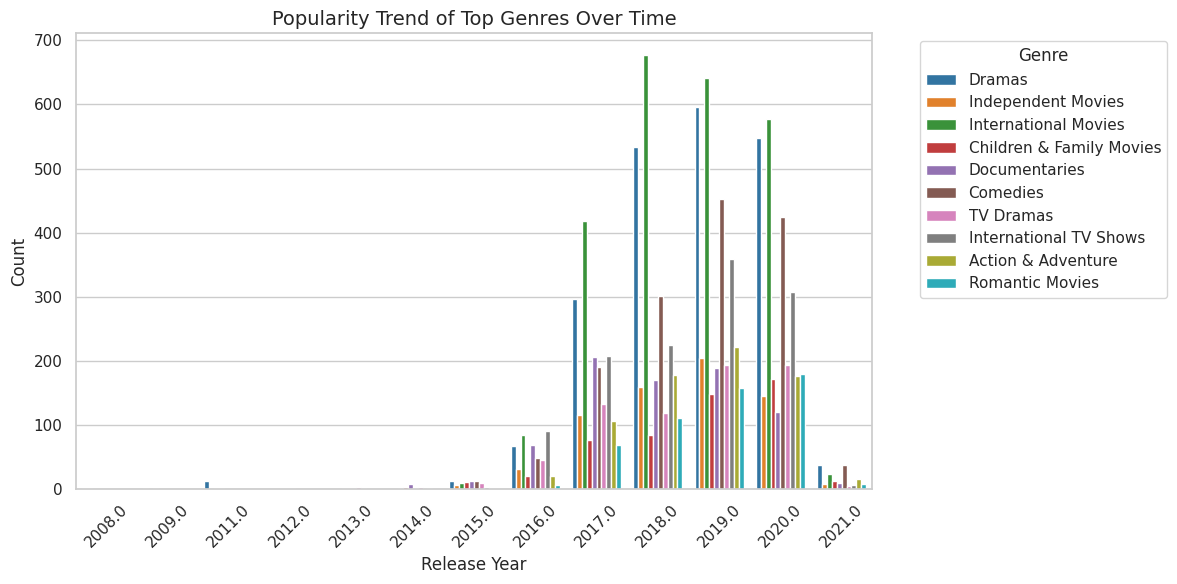

In [21]:
top_genre_names = top_genres.index.tolist()
df_genre_trend = df_genres[df_genres['genre'].isin(top_genre_names)].reset_index(drop=True)

plt.figure(figsize=(12,6))
sns.countplot(data=df_genre_trend, x='release_year', hue='genre', palette='tab10')
plt.title('Popularity Trend of Top Genres Over Time', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

----- Top 10 Countries -----
country_split
United States     3296
India              990
United Kingdom     722
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: count, dtype: int64


/tmp/ipython-input-857295328.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')


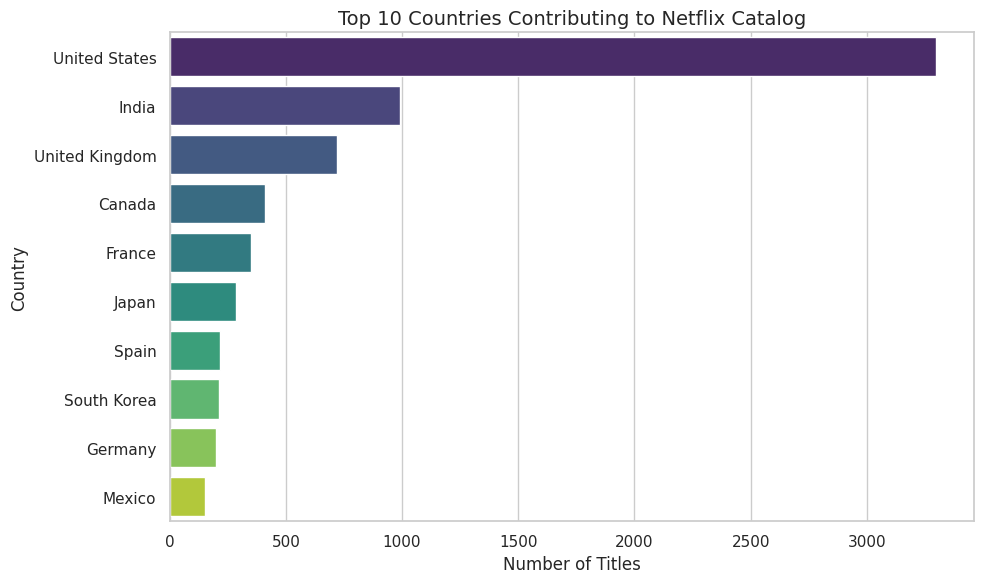

In [23]:
df_countries = df.assign(country_split=df['Country'].str.split(', ')).explode('country_split')

# Top 10 contributing countries
top_countries = df_countries['country_split'].value_counts().head(10)
print("----- Top 10 Countries -----")
print(top_countries)

# Plot top countries
plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title('Top 10 Countries Contributing to Netflix Catalog', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()